In [202]:
import requests
import pprint
import numpy as np
import pandas as pd
import seaborn as sb

pd.set_option('display.max_rows', None)

apiKey = "19qU3RJi661BLa6Am52f1AD90fGtgN155s45T9C55pK0Io1TTgG5"

In [135]:
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))

In [136]:
ecoQuery = requests.get("http://api.footprintnetwork.org/v1/countries", headers = {"Accept" : "application/json"} ,auth = ("Chris", apiKey)).json()
pprint.pprint(ecoQuery)
#testing the request

[{'countryCode': '1',
  'countryName': 'Armenia',
  'id': 1,
  'isoa2': 'AM',
  'score': '3A',
  'shortName': 'Armenia',
  'version': None},
 {'countryCode': '2',
  'countryName': 'Afghanistan',
  'id': 2,
  'isoa2': 'AF',
  'score': '3A',
  'shortName': 'Afghanistan',
  'version': None},
 {'countryCode': '3',
  'countryName': 'Albania',
  'id': 3,
  'isoa2': 'AL',
  'score': '3A',
  'shortName': 'Albania',
  'version': None},
 {'countryCode': '4',
  'countryName': 'Algeria',
  'id': 4,
  'isoa2': 'DZ',
  'score': '2A',
  'shortName': 'Algeria',
  'version': None},
 {'countryCode': '7',
  'countryName': 'Angola',
  'id': 5,
  'isoa2': 'AO',
  'score': '3A',
  'shortName': 'Angola',
  'version': None},
 {'countryCode': '8',
  'countryName': 'Antigua and Barbuda',
  'id': 6,
  'isoa2': 'AG',
  'score': '2B',
  'shortName': 'Antigua and Barbuda',
  'version': None},
 {'countryCode': '9',
  'countryName': 'Argentina',
  'id': 7,
  'isoa2': 'AR',
  'score': '3A',
  'shortName': 'Argentina',

In [137]:
#Hard coded list of top 50 countries by GDP from wikipedia, names of the countries are set to match the API 
top50Countries = ["United States of America", "China", "Japan", "Germany", "India", "United Kingdom", "France", "Italy", "Brazil", "Canada", "Russian Federation", "Korea, Republic of", "Spain", "Australia", "Mexico", "Indonesia", "Netherlands", "Saudi Arabia", "Turkey", "Switzerland", "Poland", "Thailand", "Sweden", "Belgium", "Iran, Islamic Republic of", "Austria", "Nigeria", "Argentina", "Norway", "United Arab Emirates", "Israel", "Ireland", "Malaysia", "Singapore", "South Africa", "Philippines", "Denmark", "Colombia", "Bangladesh", "Egypt", "Chile", "Pakistan", "Finland", "Viet Nam", "Czech Republic", "Romania", "Portugal", "Peru", "Iraq", "Greece"]

In [138]:
def findMyCountry(countryString): #this finds the country code based on its name from the list of all available countries
    
    countryNumber = -1 #default value to signify a failure of the search 
    countryQuery = requests.get("http://api.footprintnetwork.org/v1/countries", #new url address to the full list of countries
                                headers = {"Accept" : "application/json"} ,auth = ("Chris", apiKey)).json()
    
    for x in range(0,len(countryQuery)): #cycling through all countries to find a matching one 
        if (countryQuery[x]["countryName"] == countryString): #this tries to find a match
            countryNumber = countryQuery[x]["countryCode"] #this sets the value if a match is found
       
    return countryNumber #returns value 

#THIS IS MY CODE FROM HW 2

In [139]:
#initilizing empty dataframe with pre-structued columns
#this function takes A W H I L E to load

countriesAndEmissions = pd.DataFrame(data = None, columns = ["Country", "Carbon Footprint", "Year"])

for country in top50Countries: #iterating through the top 50 countries
    
    countryNum = findMyCountry(country) #finds the number of the country
    year = 1996 #starting year for the data
    
    while (year <= 2016): #pulling information until 2016
        
        ecoQuery = requests.get("https://api.footprintnetwork.org/v1/data/" +str(countryNum) +"/" +str(year), 
                            headers = {"Accept" : "application/json"} ,auth = ("Chris", apiKey)).json() #API request URL format
        
        #pprint.pprint(ecoQuery[0]["shortName"])
        #pprint.pprint(ecoQuery[0]["year"])
        #^^^^used these for debugging 
        
        countryBioCap = ecoQuery[2]["value"] - ecoQuery[5]["value"] #carbon footprint is based on the biocapacity subtracted from the emissions
    
        newDFRow = {"Country": country, "Carbon Footprint": countryBioCap, "Year": year}
        #adding the information to a dictionary
        countriesAndEmissions = countriesAndEmissions.append(newDFRow, ignore_index = True)
        #adding the dictionary to the dataframe
        
        year = year + 5 #iterating the year by half a decade
    
countriesAndEmissions
        

,Country,Carbon Footprint,Year
0,United States of America,-6.033895,1996
1,United States of America,-6.271413,2001
2,United States of America,-6.517774,2006
3,United States of America,-4.993362,2011
4,United States of America,-4.457361,2016
5,China,-0.981119,1996
6,China,-1.086071,2001
7,China,-1.824719,2006
8,China,-2.608338,2011
9,China,-2.663649,2016


In [140]:
#BUG TESTING ZONE

countryNum = findMyCountry("Russian Federation")
year = 2016
ecoQuery = requests.get("https://api.footprintnetwork.org/v1/data/" +str(countryNum) +"/" +str(year), 
                            headers = {"Accept" : "application/json"} ,auth = ("Chris", apiKey)).json()

#footprint = BiocapPerCap value [2]["value"] - EFConsPerCap value [5]["value"]
#print(ecoQuery)

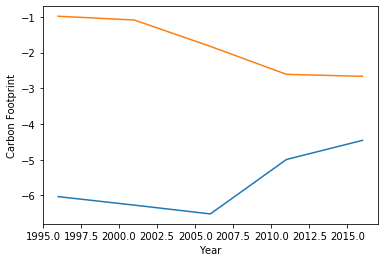

In [141]:
#ECODF Charts

unitedStatesEmissions = countriesAndEmissions.query("Country == 'United States of America'")
chinaEmissions = countriesAndEmissions.query("Country == 'China'")
sb.lineplot(x = "Year", y = "Carbon Footprint", data = unitedStatesEmissions)
sb.lineplot(x = "Year", y = "Carbon Footprint", data = chinaEmissions)

#comparing china and the US's emissions

In [142]:
#COVID DATA FUN FUN FUN!

covidDF = pd.read_csv("time_series_covid_19_confirmed.csv")
covidDF = covidDF[["Country/Region","5/1/20"]] #just getting the most recent COVID data
covidDF

,Country/Region,5/1/20
0,Afghanistan,2335
1,Albania,782
2,Algeria,4154
3,Andorra,745
4,Angola,30
5,Antigua and Barbuda,25
6,Argentina,4532
7,Armenia,2148
8,Australia,106
9,Australia,3030


In [143]:

top50CountriesCOVID = ["US", "China", "Japan", "Germany", "India", "United Kingdom", "France", "Italy", "Brazil", "Canada", "Russia", "Korea, South", "Spain", "Australia", "Mexico", "Indonesia", "Netherlands", "Saudi Arabia", "Turkey", "Switzerland", "Poland", "Thailand", "Sweden", "Belgium", "Iran", "Austria", "Nigeria", "Argentina", "Norway", "United Arab Emirates", "Israel", "Ireland", "Malaysia", "Singapore", "South Africa", "Philippines", "Denmark", "Colombia", "Bangladesh", "Egypt", "Chile", "Pakistan", "Finland", "Vietnam", "Czechia", "Romania", "Portugal", "Peru", "Iraq", "Greece"]
#this countries list has the names of the top 50 GPD nations formatted for the COVID data, for instance, United States of America -> US
top50COVIDDF = pd.DataFrame(data = None, columns = ["Country", "Number of Infected"])
#Creating the empty dataframe to store that information only 
def countryNumFinder(countryName): #this finds where the country is located in the COVID data by its index
    index = 0 #keeps track of the index location to find the country
    
    while (index < 265): #265 is the length of the dataframe
        if(covidDF.iloc[index, 0] == countryName): #this is checking for the name of the country to find the index
            return index #this returns the index if the country is found
        
        else:
            index = index + 1 #this iterates the index

for countryName in top50CountriesCOVID: #this iterates through the list of the top 50 countries
    
    countryNum = countryNumFinder(countryName) #find index number of the country
    
    newDF50Row = {"Country": countryName, "Number of Infected": covidDF.iloc[countryNum, 1]} #creates a dictionary with the country name and the information we need 

    top50COVIDDF = top50COVIDDF.append(newDF50Row, ignore_index = True) #adding the row to the new dataframe
    
    
top50COVIDDF.sort_values("Number of Infected", ascending = False) #printing to check if it worked


,Country,Number of Infected
0,US,1103461
12,Spain,213435
7,Italy,207428
3,Germany,164077
18,Turkey,122392
10,Russia,114431
24,Iran,95646
8,Brazil,92202
23,Belgium,49032
47,Peru,40459


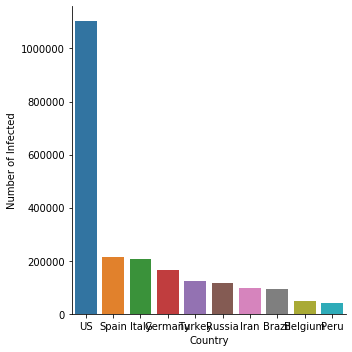

In [144]:
sb.catplot(x = "Country", y = "Number of Infected", data = top50COVIDDF.sort_values("Number of Infected", ascending = False).head(10), kind = "bar")
#simple bar graph to show the infections (RIP USA)

In [148]:
masterDF = pd.DataFrame(data = None, columns = ["Country", "Carbon Footprint", "Year", "COVID-19 Infections"])
#This dataframe will have the combined data of both the sets 
index = 0 #this will run through the name of countries from the first API request
covidIndex = 0 #this runs through the COVID countries from the second CSV dataset

while (index < 50): #both country lists only have 50 countries
    covidCount = 0 #count for the COVID dataset being reset to 0
    
    while (covidCount < 5): #since each eco query country has 5 entries, it has to add the data 5 times before it can iterate again
        
        newDict = {"Country": top50CountriesCOVID[index], "Carbon Footprint": countriesAndEmissions.iloc[covidIndex, 1], 
                  "Year": countriesAndEmissions.iloc[covidIndex, 2], "COVID-19 Infections": top50COVIDDF.iloc[index, 1]}
        #new dictionary with all of the information from both datasets
        
        masterDF = masterDF.append(newDict, ignore_index = True) #adding information to master dataframe
        covidIndex = covidIndex + 1
        covidCount = covidCount + 1 #iterating the counts
    
    index = index + 1 #iterating the main count
            
masterDF #printing to see if it worked

,Country,Carbon Footprint,Year,COVID-19 Infections
0,US,-6.033895,1996,1103461
1,US,-6.271413,2001,1103461
2,US,-6.517774,2006,1103461
3,US,-4.993362,2011,1103461
4,US,-4.457361,2016,1103461
5,China,-0.981119,1996,991
6,China,-1.086071,2001,991
7,China,-1.824719,2006,991
8,China,-2.608338,2011,991
9,China,-2.663649,2016,991


In [162]:
covidDecendingDF = masterDF.query('Year == 2016').sort_values("COVID-19 Infections", ascending = False)
covidDecendingDF #highest infected countries

,Country,Carbon Footprint,Year,COVID-19 Infections
4,US,-4.457361,2016,1103461
64,Spain,-2.666479,2016,213435
39,Italy,-3.494915,2016,207428
19,Germany,-3.222852,2016,164077
94,Turkey,-1.919147,2016,122392
54,Russia,1.796970,2016,114431
124,Iran,-2.460921,2016,95646
44,Brazil,5.888800,2016,92202
119,Belgium,-5.466303,2016,49032
239,Peru,1.446022,2016,40459


In [163]:
carbonDecendingDF = masterDF.query('Year == 2016').sort_values("Carbon Footprint")
carbonDecendingDF #countries with the worse carbon footprint

,Country,Carbon Footprint,Year,COVID-19 Infections
149,United Arab Emirates,-8.355620,2016,13038
169,Singapore,-5.820951,2016,17101
89,Saudi Arabia,-5.814905,2016,24097
119,Belgium,-5.466303,2016,49032
59,"Korea, South",-5.331381,2016,10780
154,Israel,-4.624003,2016,16101
4,US,-4.457361,2016,1103461
84,Netherlands,-4.008994,2016,100
14,Japan,-3.910996,2016,14305
99,Switzerland,-3.632661,2016,29705


In [205]:
countryComparedCoefficentDF = pd.DataFrame(data = None, columns = ["Country", "Difference in Placement"])

#this funciton and dataframe are set up to see the difference between the placement of the infection rates and the carbon footprint
#and produces a coefficent to demonstrate the difference

for country in top50CountriesCOVID: 
    
    coefficent = -1 #all of the variables being set to default values one for each dataframe and the placement variables 
    carbonIndex = 0
    carbonPlacement = -1
    covidIndex = 0
    covidPlacement = -1
    
    while (carbonIndex < 50): #finding the first countries placment in the carbon dataframe
        
        if (carbonDecendingDF.iloc[carbonIndex, 0] == country): #checking to see if the specified country matches the index location
            carbonPlacement = carbonIndex
            carbonIndex = 50
        
        else:
            carbonIndex = carbonIndex + 1
            
    while (covidIndex < 50): #doing the dame for the COVID dataframe
        
        if (covidDecendingDF.iloc[covidIndex, 0] == country):
            covidPlacement = covidIndex
            covidIndex = 50
            
        else:
            covidIndex = covidIndex + 1
            
    coefficent = abs(covidPlacement - carbonPlacement) #finding the difference between the two placement numbers
    
    newDict = {"Country": country, "Difference in Placement": coefficent} #preparing new information in a dictionary
    countryComparedCoefficentDF = countryComparedCoefficentDF.append(newDict, ignore_index = True) #adding the information to the new dataframe
    
countryComparedCoefficentDF #printing to see the results
        

,Country,Difference in Placement
0,US,6
1,China,25
2,Japan,14
3,Germany,9
4,India,24
5,United Kingdom,36
6,France,23
7,Italy,8
8,Brazil,40
9,Canada,13


In [206]:
countryComparedCoefficentDF.sort_values("Difference in Placement", ascending = False)

,Country,Difference in Placement
16,Netherlands,42
8,Brazil,40
10,Russia,38
5,United Kingdom,36
47,Peru,31
22,Sweden,30
36,Denmark,26
1,China,25
49,Greece,24
29,United Arab Emirates,24


In [207]:
countryComparedCoefficentDF.sort_values("Difference in Placement")

,Country,Difference in Placement
13,Australia,2
20,Poland,2
19,Switzerland,2
46,Portugal,3
26,Nigeria,3
35,Philippines,4
23,Belgium,5
39,Egypt,6
0,US,6
32,Malaysia,7


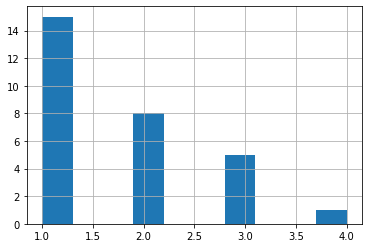

In [208]:
%matplotlib inline
countryComparedCoefficentDF["Difference in Placement"].value_counts().hist() #this was a crappy graph and I admit it

In [209]:
countryComparedCoefficentDF["Value Count"] = 1 #adding a value count for value aggrigation of the coefficent

In [227]:
valueCountDF = countryComparedCoefficentDF.groupby("Difference in Placement", as_index = False).agg({"Value Count":sum}).sort_values("Difference in Placement")
valueCountDF #aggrigated coefficents with how many times they occur and added a new index

,Difference in Placement,Value Count
0,2,3
1,3,2
2,4,1
3,5,1
4,6,2
5,7,3
6,8,2
7,9,3
8,10,2
9,11,2


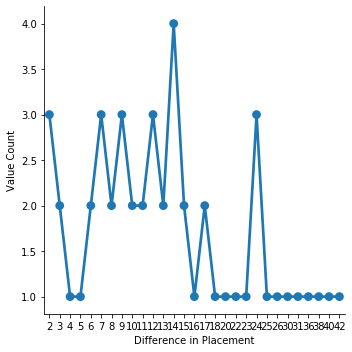

In [230]:
sb.catplot(x = "Difference in Placement", y = "Value Count", data = valueCountDF, kind = "point")
#turned this information into a line plot to look for patterns or for a bell curve type distribution 